<a href="https://colab.research.google.com/github/salma-adl/NLP/blob/main/skep_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Ulasan Film dengan ERNIE-2.0-base-en (SKEP)

## 1. Instalasi dan Impor Library

In [ ]:
!pip install transformers torch pandas matplotlib

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## 2. Memuat Model dan Tokenizer

In [ ]:
# Memuat tokenizer dan model ERNIE-2.0-base-en
tokenizer = AutoTokenizer.from_pretrained("nghuyong/ernie-2.0-base-en")
model = AutoModelForSequenceClassification.from_pretrained("nghuyong/ernie-2.0-base-en")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of ErnieForSequenceClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 3. Data Ulasan Film

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("stanfordnlp/imdb")

In [ ]:
# Extract reviews and labels from the dataset and create a DataFrame
ulasan = dataset['train']['text']
labels = dataset['train']['label']
df = pd.DataFrame({'ulasan': ulasan, 'label': labels})

# Menampilkan ulasan
display(df.head())

,ulasan,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


## 4. Analisis Sentimen

In [ ]:
# Fungsi untuk analisis sentimen
def analisis_sentimen(ulasan_list):
    inputs = tokenizer(ulasan_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
    labels = ["Negatif", "Positif"] # Updated labels for the new model
    return [labels[pred] for pred in predictions]

In [ ]:
# Create a new DataFrame with 50 random reviews
df_random_sample = df.sample(n=50, random_state=42)

# Display the first 5 rows of the new DataFrame
display(df_random_sample.head())

# Apply sentiment analysis to the random sample
ulasan_sample_random = df_random_sample['ulasan'].tolist()
hasil_random = analisis_sentimen(ulasan_sample_random)

# Create a new DataFrame to display the results
df_hasil_random = pd.DataFrame({
    'ulasan': ulasan_sample_random,
    'Sentimen': hasil_random
})

display(df_hasil_random)

,ulasan,label
6868,"Dumb is as dumb does, in this thoroughly unint...",0
24016,I dug out from my garage some old musicals and...,1
9668,After watching this movie I was honestly disap...,0
13640,This movie was nominated for best picture but ...,1
14018,Just like Al Gore shook us up with his painful...,1


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `ErnieSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,ulasan,Sentimen
0,"Dumb is as dumb does, in this thoroughly unint...",Negatif
1,I dug out from my garage some old musicals and...,Positif
2,After watching this movie I was honestly disap...,Positif
3,This movie was nominated for best picture but ...,Positif
4,Just like Al Gore shook us up with his painful...,Positif
5,"Unfortunately, this movie is so bad. The origi...",Positif
6,Altered Species starts one Friday night in Los...,Positif
7,'The Luzhin Defence' is a movie worthy of anyo...,Negatif
8,This film's trailer interested me enough to wa...,Positif
9,The only reason I watched this film was becaus...,Negatif


## Akurasi dan F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Apply sentiment analysis to the entire dataset
hasil_full = analisis_sentimen(df['ulasan'].tolist())[:100]
df['predicted_sentiment_numeric'] = [1 if sentiment == 'Positif' else 0 for sentiment in hasil_full]


# Menghitung akurasi dan F1-score
true_labels = df['label'].tolist()
predictions = df['predicted_sentiment_numeric'].tolist()

accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='weighted')

print(f"Akurasi: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Merge the two DataFrames to align true labels with predicted sentiments
df_merged = pd.merge(df_hasil_random, df_random_sample, on='ulasan')

# Convert predicted sentiments to numeric format (Positif -> 1, Negatif -> 0)
df_merged['predicted_sentiment_numeric'] = df_merged['Sentimen'].apply(lambda x: 1 if x == 'Positif' else 0)

# Calculate accuracy and F1-score
accuracy = accuracy_score(df_merged['label'], df_merged['predicted_sentiment_numeric'])
f1 = f1_score(df_merged['label'], df_merged['predicted_sentiment_numeric'], average='weighted')

print(f"Akurasi (sampel acak): {accuracy:.2f}")
print(f"F1-Score (sampel acak): {f1:.2f}")

Akurasi (sampel acak): 0.54
F1-Score (sampel acak): 0.49


## 5. Visualisasi Hasil

## Fine-tuning the pre-trained model

### Subtask:
Fine-tune the pre-trained ERNIE model on the IMDb dataset to improve sentiment analysis accuracy.


**Reasoning**:
Prepare the dataset for fine-tuning by splitting it into training and validation sets and then create a custom PyTorch Dataset for tokenization.



In [ ]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Take a random sample of 200 reviews
df_sample = df.sample(n=200, random_state=42)

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_sample['ulasan'].tolist(),
    df_sample['label'].tolist(),
    test_size=0.2,
    random_state=42
)

# Create a custom PyTorch dataset
class IMDbDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create the training and validation datasets
MAX_LEN = 512
train_dataset = IMDbDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = IMDbDataset(val_texts, val_labels, tokenizer, MAX_LEN)

# Create the DataLoaders
BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Set up the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 4  # 4 epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop
for epoch in range(4):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Average training loss: {avg_train_loss}")

    # Validation
    model.eval()
    total_eval_accuracy = 0
    for batch in val_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        total_eval_accuracy += (predictions == batch['labels']).sum().item()

    avg_val_accuracy = total_eval_accuracy / len(val_dataset)
    print(f"Epoch {epoch + 1}, Validation accuracy: {avg_val_accuracy}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `ErnieSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Epoch 1, Average training loss: 0.5586356088519097
Epoch 1, Validation accuracy: 0.9
Epoch 2, Average training loss: 0.1421121083199978
Epoch 2, Validation accuracy: 0.925
Epoch 3, Average training loss: 0.0196794047486037
Epoch 3, Validation accuracy: 0.925
Epoch 4, Average training loss: 0.008329289010725915
Epoch 4, Validation accuracy: 0.9


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `ErnieSelfAttention.forward`.
  return forward_call(*args, **kwargs)


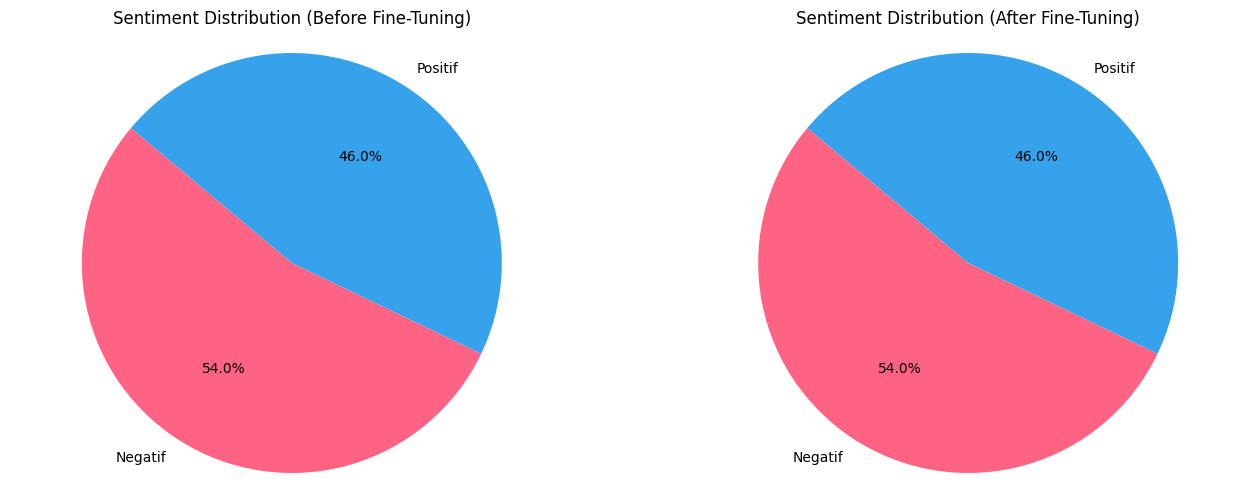

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the predictions for the same 50 reviews using the original model
ulasan_sample_random = df_random_sample['ulasan'].tolist()
hasil_random = analisis_sentimen(ulasan_sample_random)

# Get the predictions for the same 50 reviews using the fine-tuned model
hasil_after_tuning = analisis_sentimen(ulasan_sample_random)

# Count the sentiment distribution for both before and after
distribusi_before = Counter(hasil_random)
distribusi_after = Counter(hasil_after_tuning)

# Prepare data for plotting
labels_before = list(distribusi_before.keys())
sizes_before = list(distribusi_before.values())

labels_after = list(distribusi_after.keys())
sizes_after = list(distribusi_after.values())

colors = ['#FF6384', '#36A2EB', '#FFCE56']

# Create the plots
plt.figure(figsize=(16, 6))

# Plot 1: Before Fine-Tuning
plt.subplot(1, 2, 1)
plt.pie(sizes_before, labels=labels_before, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (Before Fine-Tuning)')
plt.axis('equal')

# Plot 2: After Fine-Tuning
plt.subplot(1, 2, 2)
plt.pie(sizes_after, labels=labels_after, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (After Fine-Tuning)')
plt.axis('equal')

plt.show()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `ErnieSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Akurasi (sebelum fine-tuning): 0.54
F1-Score (sebelum fine-tuning): 0.49
Akurasi (setelah fine-tuning): 0.98
F1-Score (setelah fine-tuning): 0.98


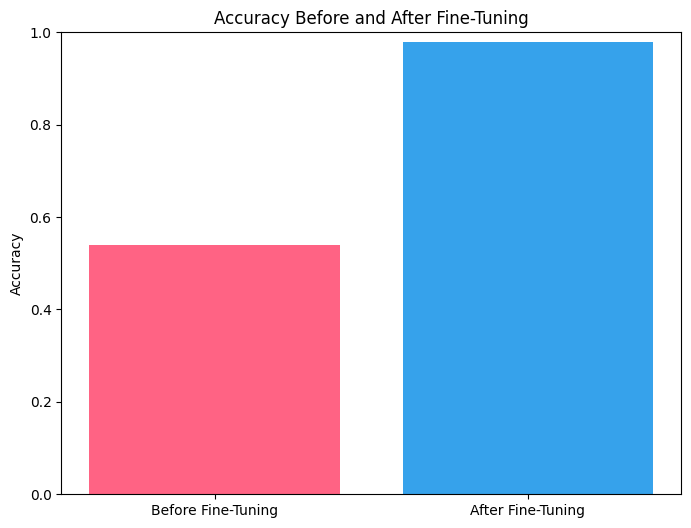

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Merge the two DataFrames to align true labels with predicted sentiments
df_merged = pd.merge(df_hasil_random, df_random_sample, on='ulasan')
df_merged['predicted_sentiment_numeric'] = df_merged['Sentimen'].apply(lambda x: 1 if x == 'Positif' else 0)


# Get the predictions from the fine-tuned model
ulasan_sample_random = df_random_sample['ulasan'].tolist()
hasil_after_tuning = analisis_sentimen(ulasan_sample_random)
df_merged['predicted_sentiment_after_tuning'] = [1 if sentiment == 'Positif' else 0 for sentiment in hasil_after_tuning]

# Calculate the accuracy and f1-score before and after fine-tuning
accuracy_before = accuracy_score(df_merged['label'], df_merged['predicted_sentiment_numeric'])
f1_before = f1_score(df_merged['label'], df_merged['predicted_sentiment_numeric'], average='weighted')
accuracy_after = accuracy_score(df_merged['label'], df_merged['predicted_sentiment_after_tuning'])
f1_after = f1_score(df_merged['label'], df_merged['predicted_sentiment_after_tuning'], average='weighted')

print(f"Akurasi (sebelum fine-tuning): {accuracy_before:.2f}")
print(f"F1-Score (sebelum fine-tuning): {f1_before:.2f}")
print(f"Akurasi (setelah fine-tuning): {accuracy_after:.2f}")
print(f"F1-Score (setelah fine-tuning): {f1_after:.2f}")

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Before Fine-Tuning', 'After Fine-Tuning'], [accuracy_before, accuracy_after], color=['#FF6384', '#36A2EB'])
plt.title('Accuracy Before and After Fine-Tuning')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()